## Plotting Options Implied Volatility Surfaces with Matplotlib

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from openbb import obb

In [22]:
obb.user.preferences.output_type = "dataframe"

Fetches options chains for the equity "AAPL" using the "cboe" provider and stores it in 'chains'

In [23]:
chains = obb.derivatives.options.chains(
    "AAPL",
    provider="cboe",
)

Filters the options chains to include only call options

In [24]:
calls = chains[chains.option_type == "call"]

Further filters the call options to include only those with less than 90 days to expiration and strike price greater than or equal to 100

In [25]:
calls = calls[(calls.dte < 90) & (calls.strike >= 100)]

Drops duplicate rows based on 'strike' and 'dte' columns, keeping the first occurrence

In [26]:
calls.drop_duplicates(subset=["strike", "dte"], keep=False, inplace=True)

Creates a volatility surface by pivoting the data on 'strike' and 'dte' with 'implied_volatility' as values, and drops columns with all NaN values

In [27]:
vol_surface = calls.pivot(
    index="strike", columns="dte", values="implied_volatility"
).dropna(how="all", axis=1)

Generates meshgrid for 'strike' and 'dte' based on the volatility surface

In [28]:
strike, dte = np.meshgrid(vol_surface.columns, vol_surface.index)

Build the 3D plot

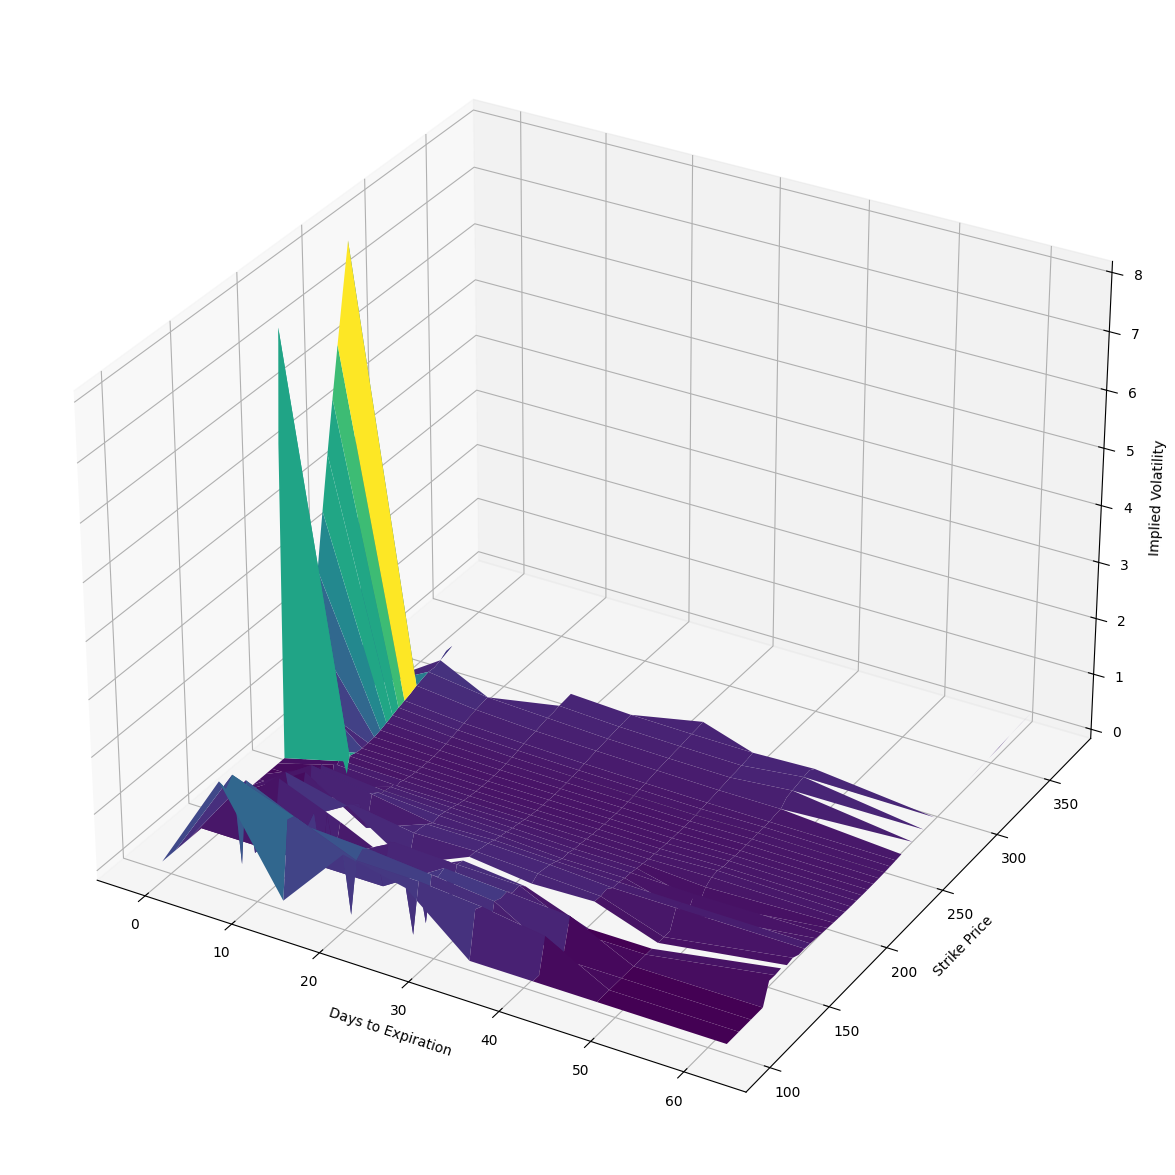

In [32]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")

ax.set_xlabel("Days to Expiration")
ax.set_ylabel("Strike Price")
ax.set_zlabel("Implied Volatility")

ax.plot_surface(strike, dte, vol_surface.values, cmap="viridis")

**Jason Strimpel** is the founder of <a href='https://pyquantnews.com/'>PyQuant News</a> and co-founder of <a href='https://www.tradeblotter.io/'>Trade Blotter</a>. His career in algorithmic trading spans 20+ years. He previously traded for a Chicago-based hedge fund, was a risk manager at JPMorgan, and managed production risk technology for an energy derivatives trading firm in London. In Singapore, he served as APAC CIO for an agricultural trading firm and built the data science team for a global metals trading firm. Jason holds degrees in Finance and Economics and a Master's in Quantitative Finance from the Illinois Institute of Technology. His career spans America, Europe, and Asia. He shares his expertise through the <a href='https://pyquantnews.com/subscribe-to-the-pyquant-newsletter/'>PyQuant Newsletter</a>, social media, and has taught over 1,000+ algorithmic trading with Python in his popular course **<a href='https://gettingstartedwithpythonforquantfinance.com/'>Getting Started With Python for Quant Finance</a>**. All code is for educational purposes only. Nothing provided here is financial advise. Use at your own risk.